In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))

In [2]:
results_file <- file.path("results", "fat_globule_analysis_results.tsv")
all_results_df <- readr::read_tsv(results_file, col_types=readr::cols())
all_results_df <- all_results_df %>%
    dplyr::mutate(bodipy_color = ifelse(
        grepl("BODIPY", all_results_df$cp_feature),
        'bodipy feature', "not bodipy")
                 )

head(all_results_df, 3)

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

cp_feature,t_stat,p_val,FFA,diff_day,neg_log_10_p,bodipy_color
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
Cells_AreaShape_Eccentricity,0.4015376,0.7046114,0,0,0.1520503,not bodipy
Cells_AreaShape_Eccentricity,0.4845427,0.6484809,1,0,0.1881028,not bodipy
Cells_AreaShape_Eccentricity,2.2586944,0.0734718,0,14,1.1338793,not bodipy


In [3]:
length(unique(all_results_df$cp_feature))

[1] 679

In [4]:
label_logic <- abs(all_results_df$neg_log_10_p) > 3 | all_results_df$t_stat < -5

In [5]:
append_day <- function(string) paste("Day:", string)
append_ffa <- function(string) paste0("FFA: ", string)

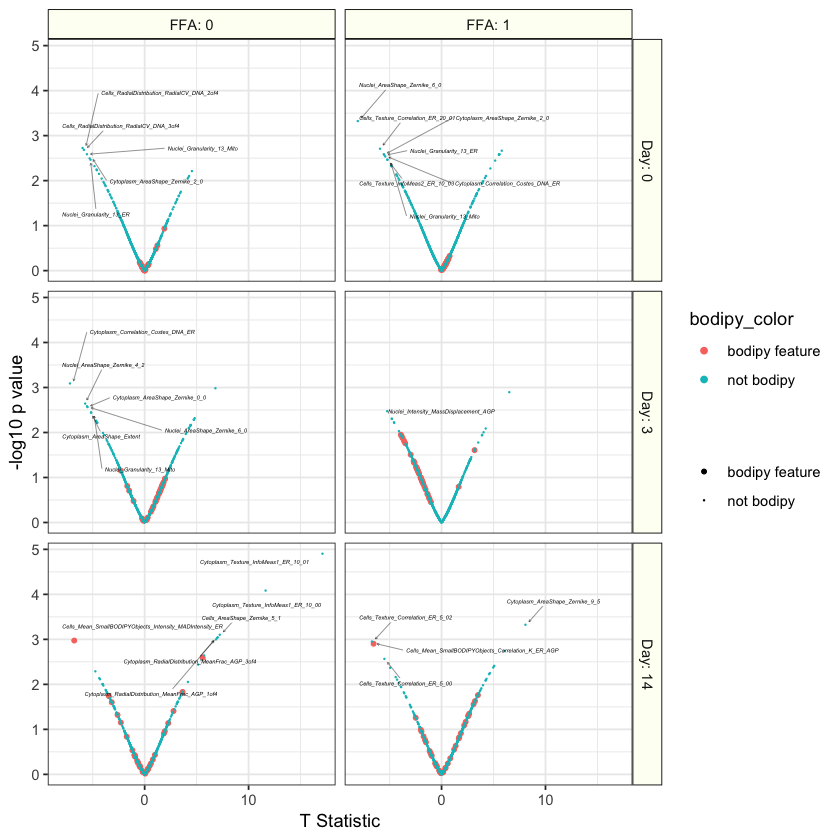

In [6]:
ggplot(all_results_df,
       aes(x=t_stat, y=neg_log_10_p)) +
    geom_point(aes(color = bodipy_color,
                   size = bodipy_color)) +
    xlab("T Statistic") +
    ylab("-log10 p value") +
    facet_grid(diff_day~FFA,
               labeller = labeller(diff_day = as_labeller(append_day),
                                   FFA = as_labeller(append_ffa))) +
    scale_size_manual(name = "", 
                      values = c("bodipy feature" = 1, "not bodipy" = 0.02)) +
    theme_bw() +
    geom_text_repel(data = subset(all_results_df, label_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    box.padding = 0.6,
                    point.padding = 0.3,
                    segment.size = 0.2,
                    segment.alpha = 0.6,
                    size = 1.2,
                    fontface = "italic",
                    aes(label = cp_feature,
                        x = t_stat,
                        y = neg_log_10_p)) +
    theme(strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

out_file <- file.path("figures", "volcano_fat_globule_viz.png")
ggsave(out_file, height = 6, width = 7, dpi = 300)

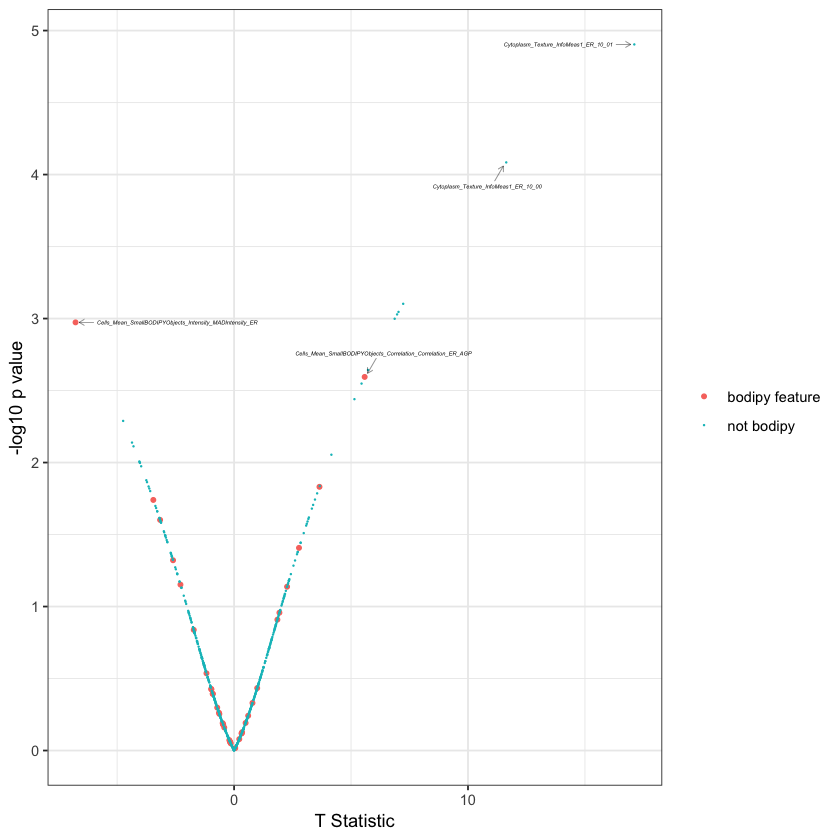

In [7]:
subset_results_df <- all_results_df %>%
    dplyr::filter(diff_day == "14", FFA == 0)

label_logic <- (
    (
        abs(subset_results_df$neg_log_10_p) > 2.5 &
        subset_results_df$bodipy_color == "bodipy feature"
    ) | 
    subset_results_df$t_stat < -5 | 
    subset_results_df$t_stat > 10
    )

ggplot(subset_results_df,
       aes(x=t_stat, y=neg_log_10_p)) +
    geom_point(aes(color = bodipy_color,
                   size = bodipy_color)) +
    xlab("T Statistic") +
    ylab("-log10 p value") +
    scale_size_manual(name = "", 
                      values = c("bodipy feature" = 1, "not bodipy" = 0.02)) +
    scale_color_discrete(name = "") +
    theme_bw() +
    geom_text_repel(data = subset(subset_results_df, label_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    box.padding = 0.6,
                    point.padding = 0.3,
                    segment.size = 0.2,
                    segment.alpha = 0.6,
                    size = 1.2,
                    fontface = "italic",
                    aes(label = cp_feature,
                        x = t_stat,
                        y = neg_log_10_p)) +
    theme(strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

out_file <- file.path("figures", "volcano_fat_globule_viz_day14_FFA0.png")
ggsave(out_file, height = 3.5, width = 5, dpi = 300)

In [8]:
label_logic <- (all_results_df$bodipy_color == "bodipy feature" &
                all_results_df$FFA == 0 &
                all_results_df$t_stat > 5 &
                all_results_df$diff_day == 14) | 
    (all_results_df$bodipy_color == "bodipy feature" &
     all_results_df$FFA == 0 &
     all_results_df$t_stat < -6 &
     all_results_df$diff_day == 14) |
(all_results_df$bodipy_color == "bodipy feature" &
                all_results_df$FFA == 1 &
                all_results_df$t_stat > 5 &
                all_results_df$diff_day == 14) | 
    (all_results_df$bodipy_color == "bodipy feature" &
     all_results_df$FFA == 1 &
     all_results_df$t_stat < -6 &
                all_results_df$diff_day == 14)

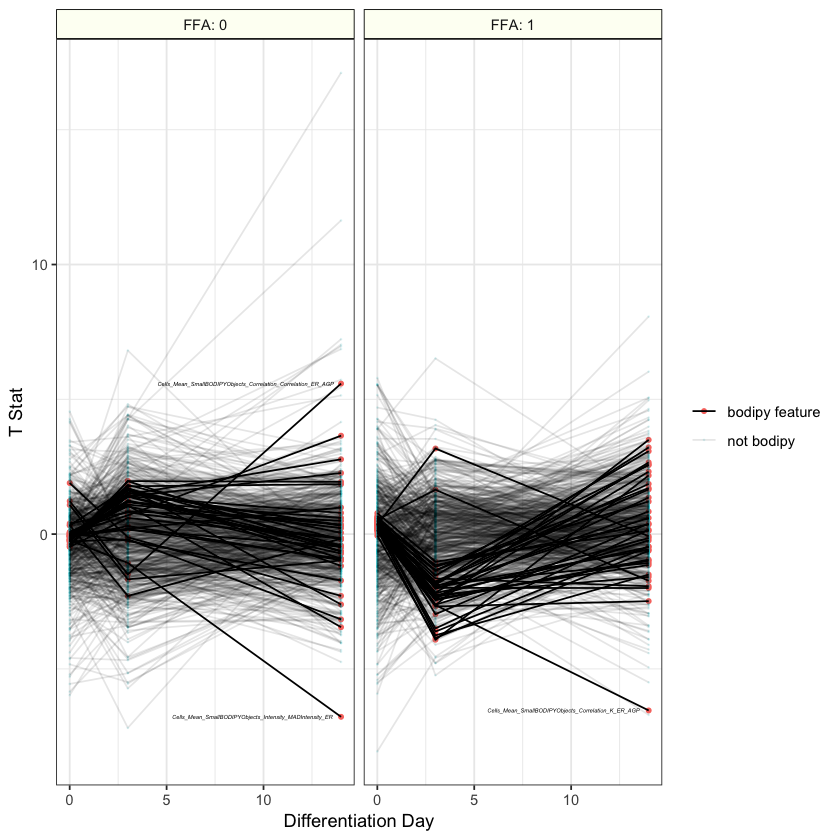

In [9]:
ggplot(all_results_df,
       aes(x = diff_day, y = t_stat, group = cp_feature)) +
    geom_point(aes(color = bodipy_color,
                   alpha = bodipy_color,
                   size = bodipy_color)) +
    geom_line(aes(alpha = bodipy_color)) +
    ylab("T Stat") +
    xlab("Differentiation Day") +
    facet_wrap(~FFA,
               labeller = labeller(FFA = as_labeller(append_ffa))) +
    scale_color_discrete(name = "") +
    scale_alpha_manual(name = "",
                       values = c("bodipy feature" = 1,
                                  "not bodipy" = 0.1)) +
    scale_size_manual(name = "", 
                      values = c("bodipy feature" = 1,
                                 "not bodipy" = 0.1)) +
    theme_bw() +
    theme(strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4")) +
    geom_text_repel(data = subset(all_results_df, label_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    box.padding = 0.6,
                    point.padding = 0.3,
                    segment.size = 0.2,
                    segment.alpha = 0.6,
                    size = 1.2,
                    fontface = "italic",
                    aes(label = cp_feature,
                        x = diff_day,
                        y = t_stat))

out_file <- file.path("figures", "trajectory_fat_globule_viz.png")
ggsave(out_file, height = 5, width = 7, dpi = 300)